# LGM VIP INTERNSHIP (BATCH NOVEMBER 2021)
# Task 1: Iris Classification
Note: This notebook is for the task 1 of the LGM VIP Internship.
#### writer : HRISIKESH NEOGI

### ABOUT THE DATA:
### IRIS DATA SET:
The iris data set is a classic and very easy dataset to handle.
It consists of 3 different types of iris flowers (Setosa, Versicolour, and Virginica) and
their sepal and petal measurements.
### COLUMNS:
- Sepal Length: the length of the sepals
- Sepal Width: the width of the sepals
- Petal Length: the length of the petal
- Petal Width: the width of the petal 
### TARGET:
The target is the type of iris flower.

### PROJECT DESCRIPTION:
The project is to build a machine learning model to predict the type of iris flower.
The model will be trained on the iris data set and will be tested on the same data set.
The model will be tested on the test set and the accuracy will be calculated.

### APPROACH:
The project will be divided into 3 parts:
1. Data Preprocessing
2. Model Building
3. Model Evaluation



#### READING THE DATA:
The data set is read using pandas.
The data is stored in a data frame called df.

In [1]:
#reading data set
import pandas as pd
import numpy as np

In [2]:
#Attribute Information:
columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
iris = pd.read_csv('E:\\november internships\\LGM-VIP\\datasets\\iris.data', names=columns, index_col=False)

In [3]:
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
iris.shape

(150, 5)

In [4]:
#descriptive statistics
iris.describe()


,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### data cleaning:
The data is cleaned using the following steps:
1. Remove the rows with missing values
2. Remove the rows with missing values in the target column
3. Remove the rows with missing values in the sepal length column
4. Remove the rows with missing values in the sepal width column
5. Remove the rows with missing values in the petal length column
6. Remove the rows with missing values in the petal width column


In [5]:
#data cleaning
#checking missing values
iris.isnull().sum()


sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

#### looks like there is no null values in the data set. Let's move on to the next step. 

In [6]:
#let's check the column types
iris.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object

#### as we can see the target column is categorical. So we need to convert it to numerical. 

### DATA PREPROCESSING:

In [7]:
#data preprocessing
#converting string to numeric
iris['class'] = iris['class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
iris.head()


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### EDA:


In [8]:
#eda
#checking the distribution of each class
iris.groupby('class').size()


class
0    50
1    50
2    50
dtype: int64

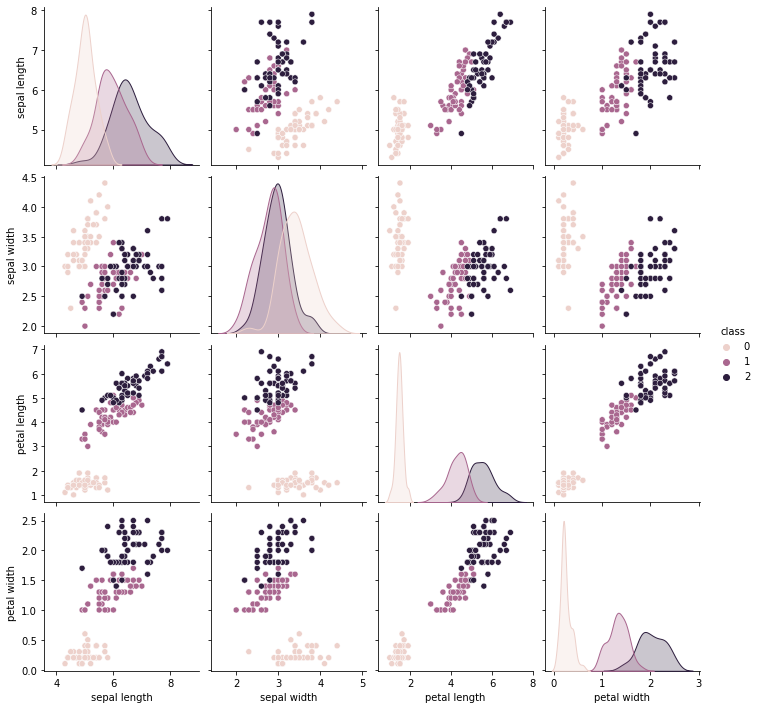

In [9]:
#eda    
#checking the correlation between the features and plot
import seaborn as sns
sns.pairplot(iris, hue='class')


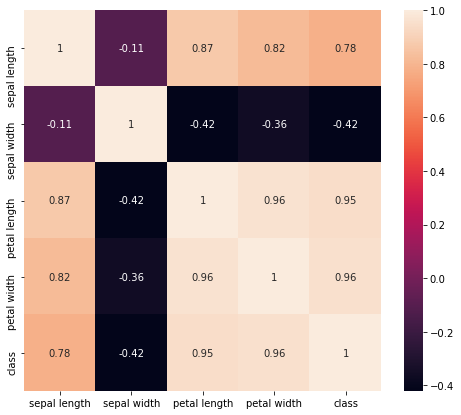

In [36]:
plt.subplots(figsize = (8,7))
sns.heatmap(iris.corr(),annot=True)
plt.show()

### what can we say from the pairplot of the data? 
1. sepal length and sepal width are positively correlated
2. petal length and petal width are negatively correlated
3. sepal length and petal length are negatively correlated
4. sepal length and petal width are positively correlated
5. sepal width and petal length are negatively correlated
6. sepal width and petal width are positively correlated


# : scatter plot of sepal length vs sepal width on top of classes

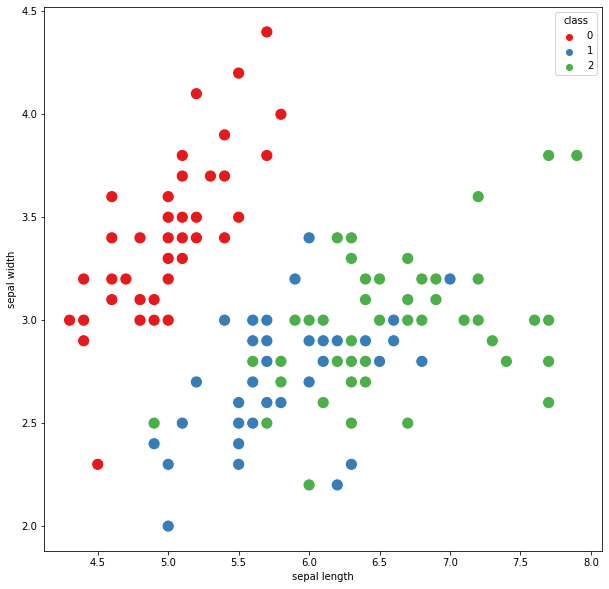

In [37]:
#visualization
#visualizing the relationship between the features and the class
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.scatterplot(x='sepal length', y='sepal width', hue='class', data=iris, palette='Set1', s=150)
plt.show()


# : scatter plot of petal length vs petal width on top of classes

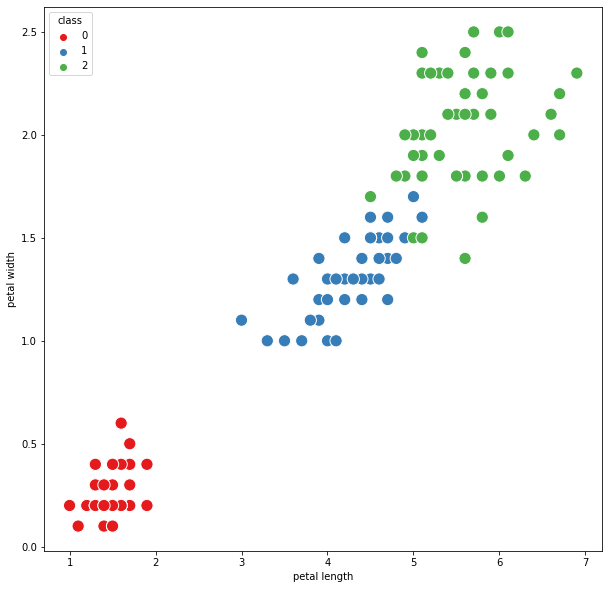

In [38]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='petal length', y='petal width', hue='class', data=iris, palette='Set1', s=150)
plt.show()


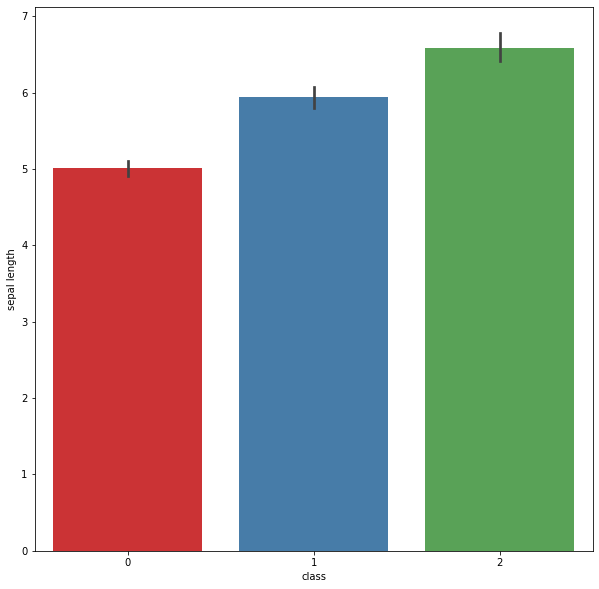

In [11]:
#visualization of the relationship between the features and the class with bar plot
plt.figure(figsize=(10,10))
sns.barplot(x='class', y='sepal length', data=iris, palette='Set1')
plt.show()


# X and Y division

### splitting the data into train and test sets using sklearn library 


In [12]:
x = iris.drop('class', axis=1)
y = iris['class']

In [13]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=1)


## model building: 
      **We will build four models with -**
        1. Logistic Regression
        2. Decision Tree
        3. Random forest
        4. KNN

## 1. Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
#let's build the model with best parameters
logr = LogisticRegression()
logr.fit(x_train, y_train)

C:\Users\neogi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Let's find the accuracy of the model

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [17]:
test_score = logr.score(x_test, y_test)

In [18]:
train_score = logr.score(x_train, y_train)

In [19]:
print(f'The train score is : {"%.2f"% train_score} \nThe test score is: {"%.2f"%test_score}')

The train score is : 0.98 
The test score is: 0.97


#### looks like the model is a good model

# 2. DECISION TREE

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dt = DecisionTreeClassifier(random_state=20)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=20)

In [22]:
dt_y_pred = dt.predict(x_test)

In [23]:
dt_Accuracy = accuracy_score(y_test, dt_y_pred)
print("The decision tree classifier gives the model accuracy = {}".format("%.2f"%dt_Accuracy))

The decision tree classifier gives the model accuracy = 0.97


In [24]:
confusion_matrix(y_test, dt_y_pred)

array([[19,  0,  0],
       [ 0, 20,  1],
       [ 0,  1, 19]], dtype=int64)

# 3. Random forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [26]:
rf_y_pred = rf.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [28]:
accuracy = accuracy_score(y_test, rf_y_pred)
cls_Rep = classification_report(y_test, rf_y_pred)
cnfs_mat = confusion_matrix(y_test, rf_y_pred)
r2 = r2_score(y_test, rf_y_pred)
mn_S_e = mean_squared_error(y_test, rf_y_pred)

print("""The classification report is: \n{}
\nThe accuracy score is: \n{}
\n The confusion matrix is: \n{}
\n The r2 square is : \n{}
\nThe mean squared error is: \n{}


""".format(cls_Rep, "%.2f"%accuracy, cnfs_mat, r2, mn_S_e)


)

The classification report is: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.95      0.95      0.95        21
           2       0.95      0.95      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60


The accuracy score is: 
0.97

 The confusion matrix is: 
[[19  0  0]
 [ 0 20  1]
 [ 0  1 19]]

 The r2 square is : 
0.9486960239418555

The mean squared error is: 
0.03333333333333333





# 4. KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10, p=1)

In [31]:
knn_y_pred = knn.predict(x_test)

In [32]:
k_accuracy = accuracy_score(y_test, knn_y_pred)
k_cls_Rep = classification_report(y_test, knn_y_pred)
k_cnfs_mat = confusion_matrix(y_test, knn_y_pred)
k_r2 = r2_score(y_test, knn_y_pred)
k_mn_S_e = mean_squared_error(y_test, knn_y_pred)

print("""The classification report is: \n{}
\nThe accuracy score is: \n{}
\n The confusion matrix is: \n{}
\n The r2 square is : \n{}
\nThe mean squared error is: \n{}


""".format(k_cls_Rep, "%.2f"%k_accuracy, k_cnfs_mat, k_r2, k_mn_S_e)


)

The classification report is: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.95      0.95      0.95        21
           2       0.95      0.95      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60


The accuracy score is: 
0.97

 The confusion matrix is: 
[[19  0  0]
 [ 0 20  1]
 [ 0  1 19]]

 The r2 square is : 
0.9486960239418555

The mean squared error is: 
0.03333333333333333





## OBSERVATION : IN an avg. all the four model is giving the accuracy = 96%